## Preliminaries (imports)

In [1]:
from IPython.display import display, Markdown

import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ray.tune import Analysis

def printmd(text: str) -> None:
    display(Markdown(text))

In [2]:
import sys
sys.path.append('../src')

from config import config
from rendering import sampling

from experiment_analysis.experiment import Experiment
from experiment_analysis.parsing import load_experiments

config.set_data_dir("../data")

ray_dir = Path("../ray_results/")

# Tune trials analysis

In [3]:
trials = list(ray_dir.iterdir())
print("\n".join(str(t) for t in trials))

../ray_results/Trainable_2021-05-16_10-25-46
../ray_results/Trainable_2021-05-11_18-59-15
../ray_results/Trainable_2021-05-10_17-14-26
../ray_results/Trainable_2021-05-16_17-40-42
../ray_results/Trainable_2021-05-16_00-28-02
../ray_results/Trainable_2021-05-11_19-02-42
../ray_results/Trainable_2021-05-13_21-52-57
../ray_results/Trainable_2021-05-16_13-14-15


In [4]:
analysis = Analysis(ray_dir)

In [5]:
analysis_columns = ["accuracy", "mcc", "f1_score", "config/network", "config/lr_extraction", "config/lr_tuning", "config/objective_metric", "logdir"]
analysis_df = analysis.dataframe(metric="mcc", mode="max").loc[:, analysis_columns].sort_values("mcc", ascending=False)

printmd("### tune trials dataframe")
display(analysis_df)

### tune trials dataframe

,accuracy,mcc,f1_score,config/network,config/lr_extraction,config/lr_tuning,config/objective_metric,logdir
10,0.890299,0.694805,0.892465,Hybrid,0.000638,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
18,0.881233,0.671793,0.884617,Hybrid,0.000971,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
11,0.874887,0.666379,0.881313,Hybrid,0.003785,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
12,0.872167,0.650085,0.875698,Hybrid,0.001672,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
15,0.861287,0.623752,0.865089,Hybrid,0.002780,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
14,0.854941,0.623681,0.864915,Hybrid,0.002906,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
19,0.862194,0.615434,0.864803,Hybrid,0.006815,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
17,0.851315,0.610348,0.861171,Hybrid,0.006204,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
13,0.838622,0.600765,0.853241,Hybrid,0.004163,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...
16,0.802357,0.545985,0.828815,Hybrid,0.005426,0.0001,mcc,../ray_results/Trainable_2021-05-16_00-28-02/T...


In [6]:
best_experiment_dir = Path(analysis.get_best_logdir(metric="mcc", mode="max"))

printmd("### best trial logdir")
display(str(best_experiment_dir))

### best trial logdir

'../ray_results/Trainable_2021-05-16_00-28-02/Trainable_e6e3101e_8_batch_size=32,data_dir=_content_data,epochs_extraction=2,epochs_tuning=10,exp_name=tune_baseline,log_level=IN_2021-05-16_04-33-16'

In [7]:
printmd("### best trial config")
display(analysis.get_best_config(metric="mcc", mode="max"))

### best trial config

{'batch_size': 32,
 'data_dir': '/content/data',
 'epochs_extraction': 2,
 'epochs_tuning': 10,
 'exp_name': 'tune_baseline',
 'log_level': 'INFO',
 'loss': {'function': 'cross_entropy'},
 'lr_extraction': 0.0006376851037796763,
 'lr_tuning': 0.0001,
 'model_params': '{"embedding_dim": 1024, "hidden_layers": 3}',
 'network': 'Hybrid',
 'objective_metric': 'mcc',
 'seed': 0,
 'val_fraction': 0.2}

# Best trial anals

In [8]:
print(best_experiment_dir / "experiments")

../ray_results/Trainable_2021-05-16_00-28-02/Trainable_e6e3101e_8_batch_size=32,data_dir=_content_data,epochs_extraction=2,epochs_tuning=10,exp_name=tune_baseline,log_level=IN_2021-05-16_04-33-16/experiments


In [9]:
best_experiment = Experiment(next((best_experiment_dir / "experiments").iterdir()))

In [11]:
printmd("### best experiment classification report")
printmd(best_experiment.classification_report("valid"))

### best experiment classification report

              precision    recall  f1-score   support

       akiec       0.62      0.60      0.61        30
         bcc       0.60      0.91      0.73        35
         bkl       0.79      0.55      0.64        88
          df       0.50      0.62      0.56         8
         mel       0.39      0.52      0.44        46
          nv       0.97      0.95      0.96       883
        vasc       0.75      0.92      0.83        13

    accuracy                           0.89      1103
   macro avg       0.66      0.73      0.68      1103
weighted avg       0.90      0.89      0.89      1103


### best experiment confusion matrix

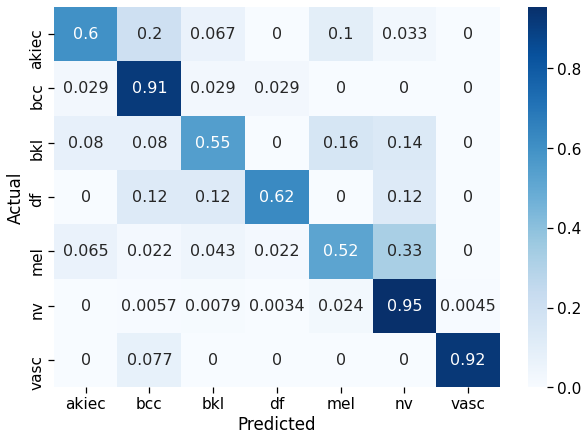

In [12]:
printmd("### best experiment confusion matrix")
best_experiment.plot_confusion_matrix("valid", normalize="true")

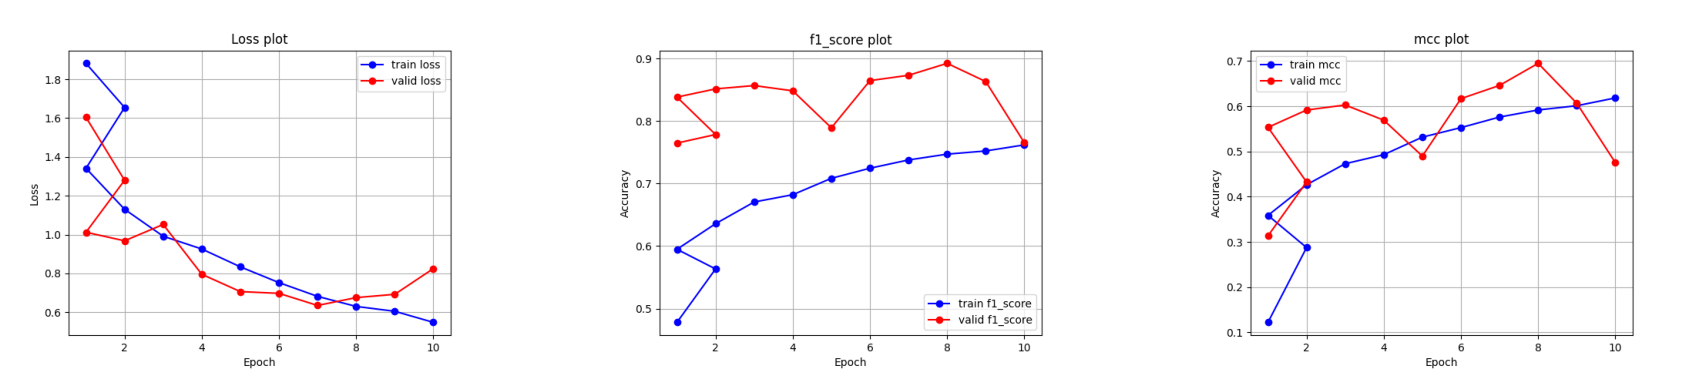

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
plot_names = ["loss", "f1_score", "mcc"]
for ax, plot_name in zip(axes.flat, plot_names):
    best_experiment.display_plot(plot_name, ax=ax)
plt.show()